In [ ]:
import torch
import matplotlib.pyplot as plt
from copy import deepcopy

In [ ]:
# checkg the torch version
torch.__version__

'2.2.1+cu121'

## Checking Info of the Data Types
1. generally un/non quantised models are represented using 32 bit floating point intergerstorch.float32
2. Quantised Models generally use int8 for representing the model weights

We have shown the info for the both the number representations in torch


In [ ]:
torch.finfo(torch.float32)

finfo(resolution=1e-06, min=-3.40282e+38, max=3.40282e+38, eps=1.19209e-07, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=float32)

In [ ]:
torch.iinfo(torch.int8)

iinfo(min=-128, max=127, dtype=int8)

# Testing Quantization, and its performance impacts

In [ ]:
# installing the trsnformers from hugging face
!pip install 'transformers[torch]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from transformers import BlipForConditionalGeneration, BlipProcessor

In [ ]:
m_n = "Salesforce/blip-image-captioning-base"
model = BlipForConditionalGeneration.from_pretrained(m_n)

In [ ]:
def model_param_data_type(model):
    for name, param in model.named_parameters():
        print(f"{name} {param.dtype}")

In [ ]:
model_param_data_type(model)

vision_model.embeddings.class_embedding torch.float32
vision_model.embeddings.position_embedding torch.float32
vision_model.embeddings.patch_embedding.weight torch.float32
vision_model.embeddings.patch_embedding.bias torch.float32
vision_model.encoder.layers.0.self_attn.qkv.weight torch.float32
vision_model.encoder.layers.0.self_attn.qkv.bias torch.float32
vision_model.encoder.layers.0.self_attn.projection.weight torch.float32
vision_model.encoder.layers.0.self_attn.projection.bias torch.float32
vision_model.encoder.layers.0.layer_norm1.weight torch.float32
vision_model.encoder.layers.0.layer_norm1.bias torch.float32
vision_model.encoder.layers.0.mlp.fc1.weight torch.float32
vision_model.encoder.layers.0.mlp.fc1.bias torch.float32
vision_model.encoder.layers.0.mlp.fc2.weight torch.float32
vision_model.encoder.layers.0.mlp.fc2.bias torch.float32
vision_model.encoder.layers.0.layer_norm2.weight torch.float32
vision_model.encoder.layers.0.layer_norm2.bias torch.float32
vision_model.encode

In [ ]:
f"{model.get_memory_footprint() / 1e+6} MB"

'989.6604 MB'

In [ ]:
# make a copy of the model
bf16_model = deepcopy(model)

In [ ]:
bf16_model = bf16_model.to(torch.bfloat16)

In [ ]:
f"{bf16_model.get_memory_footprint() / 1e+6} MB"

'494.832248 MB'

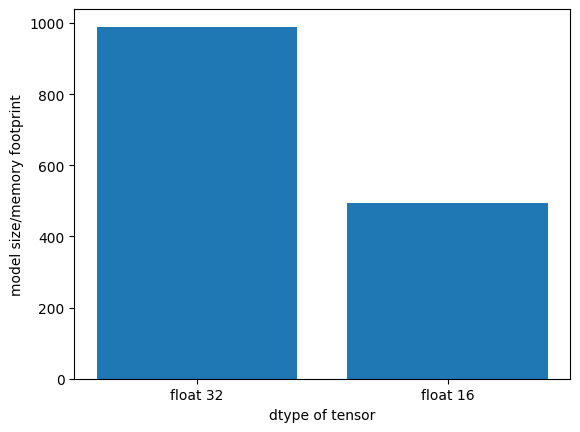

In [ ]:
plt.bar(["float 32", "float 16"], [model.get_memory_footprint()/1e+6, bf16_model.get_memory_footprint()/1e+6])
plt.xlabel("dtype of tensor")
plt.ylabel("model size/memory footprint")
plt.show()

In [ ]:
f"The difference between both the Model's size is {format((bf16_model.get_memory_footprint()/model.get_memory_footprint()) * 100, '0.2f')} %"

"The difference between both the Model's size is 50.00 %"

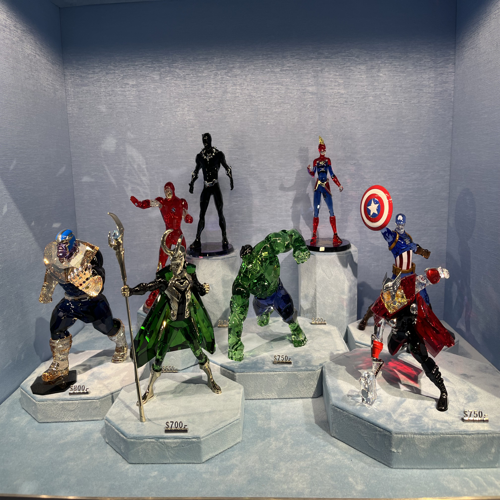

In [ ]:
from PIL import Image
image = Image.open('/content/IMG_2393.jpg').resize((500, 500))
image

In [ ]:
processor = BlipProcessor.from_pretrained(m_n)

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/89b09ea1789f7addf2f6d6f0dfc4ce10ab58ef84/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}, {'longest_edge'}), got 384. Converted to {'height': 384, 'width': 384}.
Image processor BlipImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "do_convert_rgb",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
  

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/89b09ea1789f7addf2f6d6f0dfc4ce10ab58ef84/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/89b09ea1789f7addf2f6d6f0dfc4ce10ab58ef84/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/89b09ea1789f7addf2f6d6f0dfc4ce10ab58ef84/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/89b09ea1789f7addf2f6d6f0dfc4ce10ab58ef84/tokenizer_config.json
Processor BlipProcessor:
- image_processor: BlipImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",

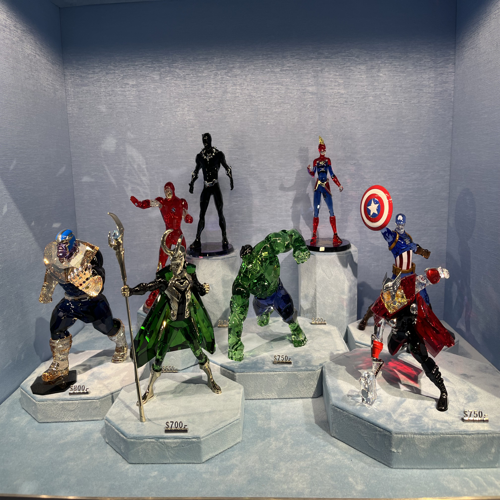

In [ ]:
image = image.convert('RGB')
image

In [ ]:
inputs = processor(image, return_tensors='pt')

In [ ]:
fp32_input = inputs
fp16_input = deepcopy(inputs).to(torch.float16)

In [ ]:
fp32_out = model.generate(**inputs)

In [ ]:
fp16_out = bf16_model.generate(**inputs)

In [ ]:
processor.decode(fp32_out[0])

'a display of action figures [SEP]'

In [ ]:
processor.decode(fp16_out[0])

'a display of action figures [SEP]'

In [ ]:
print("FP32 model output", processor.decode(fp32_out[0]))
print("FP16 model output", processor.decode(fp16_out[0]))

FP32 model output a display of action figures [SEP]
FP16 model output a display of action figures [SEP]
